In [12]:
data = spark.read.format("csv")\
.option("header", "true")\
.option("inferSchema", "true")\
.load("/home/biennt/Desktop/bigdata/data_geo.csv")
data.cache()
data.count()

294

In [13]:
display(data)
data.printSchema()

DataFrame[2014 rank: int, City: string, State: string, State Code: string, 2014 Population estimate: int, 2015 median sales price: double]

root
 |-- 2014 rank: integer (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- State Code: string (nullable = true)
 |-- 2014 Population estimate: integer (nullable = true)
 |-- 2015 median sales price: double (nullable = true)



In [14]:
data.count()
data.dropna()
data.count()

294

In [15]:
# data.createOrReplaceTempView("data_geo")
# df1 = spark.sql("""Select City, `State Code`, `2014 Population estimate`, 
#                 `2015 median sales price` From data_geo""")
# display(df1)

In [25]:
data = spark.read.csv("/home/biennt/Desktop/bigdata/data_geo.csv", header="true", inferSchema="true")
data.cache() # Cache data for faster reuse
from pyspark.sql.functions import col

data = data.dropna() # drop rows with missing values
exprs = [col(column).alias(column.replace(' ', '_')) for column in data.columns]

In [26]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler

vdata = data.select(*exprs).selectExpr("2014_Population_estimate as population", "2015_median_sales_price as label")

stages = []
assembler = VectorAssembler(inputCols=["population"], outputCol="features")
stages += [assembler]
pipeline = Pipeline(stages=stages)
pipelineModel = pipeline.fit(vdata)
dataset = pipelineModel.transform(vdata)
# Keep relevant columns
selectedcols = ["features", "label"]

In [27]:
# from pyspark.mllib.regression import LabeledPoint
# from IPython.display import display, HTML
# #LabeledPoint(double label, Vector features)
# data1 = data.select("2015 median sales price", "2014 Population estimate")\
# .rdd.map(lambda r: LabeledPoint(r[0], [r[1]]))\
# .toDF()


In [28]:
import numpy as np
import matplotlib.pyplot as plt
x = dataset.rdd.map(lambda p: (p.features[0])).collect()
y = dataset.rdd.map(lambda p: (p.label)).collect()

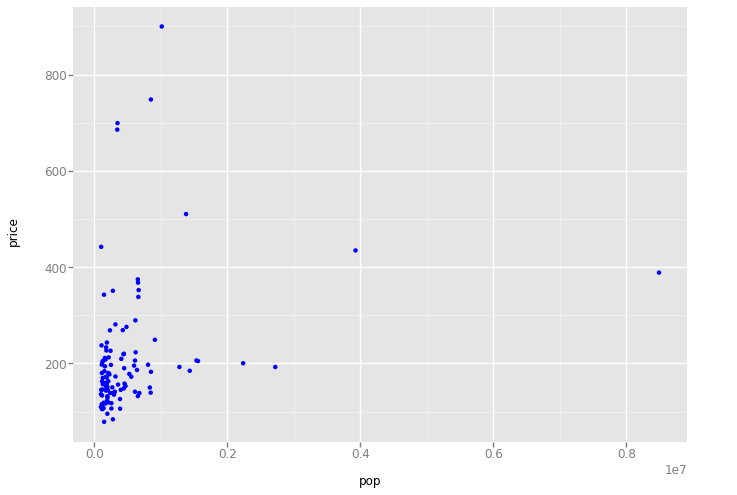

<ggplot: (8739043354905)>

In [34]:
from pandas import *
from ggplot import *
pydf = DataFrame({'pop':x,'price':y})
#pydf['pop'] = pandas.to_numeric(pydf['pop'], errors='coerce')
#pydf['price'] = pandas.to_numeric(pydf['price'], errors='coerce')
# p = ggplot(pydf, aes('pop','price')) + \
#     geom_point(color='blue')
display(p)